In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb



In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score  
from sklearn.neighbors import KNeighborsClassifier  
data = pd.read_csv('Autism-Adult-Data.arff',na_values="?")

In [8]:
#plt.figure(figsize=(10,7))
#sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)
print(data.head())

total_missing_data = data.isnull().sum().sort_values(ascending=False)

percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
print(missing_data.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  age  gender  jundice  austim  decision_class  
0         1         0          0   26       0        0       0               0  
1         1         0          1   24       1        0       1               0  
2         1         1          1   27       1        1       1               1  
3         1         0          1   35       0        0       1               0  
4         1         0          0   40       0        0       0               0  
          Total  Percent
A1_Score      0      0.0
A2_Score     

In [4]:
data.rename(columns={'Class/ASD': 'decision_class'}, inplace=True)
data.jundice = data.jundice.apply(lambda x: 0 if x == 'no' else 1)
data.decision_class = data.decision_class.apply(lambda x: 0 if x == 'NO' else 1)
data.austim = data.austim.apply(lambda x: 0 if x == 'no' else 1)
le = LabelEncoder()
data.gender = le.fit_transform(data.gender) #This method performs fit and transform on the input data at a single time and converts the data points.
data.drop(['result'], axis=1, inplace=True)

#print(data.isnull().sum())
#converting no and yes to 0's and 1's

In [ ]:
#Training Dataset

X=data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'austim', 'gender',
       'jundice']]
print(X)
Y=data[['decision_class']]
print(Y.shape) #give the lengths of the corresponding array dimensions.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101) #Split arrays or matrices into random train and test subsets.


y_train=y_train.values.ravel() #Return a contiguous flattened array.
#y_train

In [11]:
classifier = KNeighborsClassifier(n_neighbors=5)  #Classifier implementing the k-nearest neighbors vote.
classifier.fit(X_train, y_train) #Fit the k-nearest neighbors classifier from the training dataset.
y_pred = classifier.predict(X_test)    
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) #Build a text report showing the main classification metrics.
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)



[[149  10]
 [  7  46]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       159
           1       0.82      0.87      0.84        53

    accuracy                           0.92       212
   macro avg       0.89      0.90      0.90       212
weighted avg       0.92      0.92      0.92       212

Accuracy is  91.98113207547169


In [13]:

# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))




[0.9009433962264151, 0.9056603773584906, 0.910377358490566, 0.910377358490566, 0.9198113207547169, 0.9292452830188679, 0.9481132075471698, 0.9292452830188679, 0.9339622641509434, 0.910377358490566, 0.9198113207547169, 0.9056603773584906, 0.910377358490566, 0.9150943396226415, 0.9009433962264151, 0.910377358490566, 0.9056603773584906, 0.8867924528301887, 0.9009433962264151, 0.8915094339622641, 0.9009433962264151, 0.8915094339622641, 0.8962264150943396, 0.8820754716981132, 0.8773584905660378]


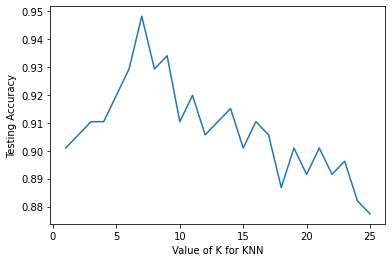

In [7]:
print(scores)
#%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show() 